# WARG CV BOOTCAMP

## Imports

In [12]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from Functions import plot_graph

print(tf.__version__)

2.7.0


## Resolving Invalid Certificate Error

In [2]:
# from stackoverflow - https://github.com/pytorch/pytorch/issues/33288

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

# Loading Data and Normalization

In [3]:
data = tf.keras.datasets.cifar10

# Loading in the training and test data
# x_train --> pixel values
# y_train --> labels (airplane, cats, dog, etc.)
(xTrain, yTrain), (xTest, yTest) = data.load_data()

# Print pixel values of training and testing data
print(f"Training Data: {x_train.shape}")
print(f"Testing Data: {x_test.shape}")


Training Data: (50000, 32, 32, 3)
Testing Data: (10000, 32, 32, 3)


In [4]:
# Normalize the data to convert from values of (0 to 255) to just (0 and 1) for the CNN
xTrain = tf.keras.utils.normalize(xTrain, axis=1)
xTest = tf.keras.utils.normalize(xTest, axis=1)

# Categorizing Data
yTrain = tf.keras.utils.to_categorical(yTrain)
yTest = tf.keras.utils.to_categorical(yTest)

## Building the Sequential Model

#### Defining Model Constants

In [5]:
# Convolutional Layer Variables
KERNEL_SIZE = (3,3)
POOL_SIZE = (2,2)
ACTIVATION_R = "relu"
INPUT_SHAPE = (32,32,3)
DROPOUT_FACTOR = 0.2

# Dense Layer w Softmax Activation Variable
ACTIVATION_S = "softmax"
CLASSES = 10

#### Building Model

In [6]:
model = tf.keras.models.Sequential()

# First Conv2D Layer
model.add(tf.keras.layers.Conv2D(
    filters = 32,
    kernel_size = KERNEL_SIZE,
    # activation method --> method to decide when and which nodes to fire
    activation = ACTIVATION_R,
    # padding --> adding layers of zero around input images to have the output image be the same size as original input image
    padding = 'same',
    # height, width, depth
    input_shape = INPUT_SHAPE   
))
model.add(tf.keras.layers.MaxPool2D(POOL_SIZE))
model.add(tf.keras.layers.Dropout(DROPOUT_FACTOR))

# Second Conv2D Layer
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = ACTIVATION_R))
model.add(tf.keras.layers.MaxPool2D(POOL_SIZE))
model.add(tf.keras.layers.Dropout(DROPOUT_FACTOR))

# Third Conv2D Layer
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = ACTIVATION_R))
model.add(tf.keras.layers.MaxPool2D(POOL_SIZE))
model.add(tf.keras.layers.Dropout(DROPOUT_FACTOR))

# Flattening Layer
model.add(tf.keras.layers.Flatten())

# Dense Layers
model.add(tf.keras.layers.Dense(units = 128, activation = ACTIVATION_R))
model.add(tf.keras.layers.Dense(units = CLASSES, activation = ACTIVATION_S))



#### Model Summary

In [7]:
# Seeing summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

#### Compiling Model

In [8]:
model.compile(
   loss="categorical_crossentropy",
   optimizer="adam",
   metrics=["accuracy"]
)

## Training (Fitting) & Evaluation of Model

#### Defining Fitting Constants 

In [9]:
BATCH_SIZE = 32
EPOCHS = 20

In [10]:
# print(x_train)
# print(y_train)

training = model.fit(xTrain, yTrain, batch_size = BATCH_SIZE, epochs = EPOCHS)

Epoch 1/20
1563/1563 [==============================] - 76s 47ms/step - loss: 1.7430 - accuracy: 0.3618
Epoch 2/20
1563/1563 [==============================] - 88s 57ms/step - loss: 1.3704 - accuracy: 0.5135
Epoch 3/20
1563/1563 [==============================] - 82s 52ms/step - loss: 1.2372 - accuracy: 0.5654
Epoch 4/20
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1499 - accuracy: 0.5989
Epoch 5/20
1563/1563 [==============================] - 84s 54ms/step - loss: 1.0854 - accuracy: 0.6176
Epoch 6/20
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0335 - accuracy: 0.6385
Epoch 7/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9953 - accuracy: 0.6512
Epoch 8/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9619 - accuracy: 0.6639
Epoch 9/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9284 - accuracy: 0.6747
Epoch 10/20
1563/1563 [==============================] - 56s 36m

#### Evaluating Model

In [11]:
valLoss, valAccuracy = model.evaluate(xTest, yTest)

313/313 [==============================] - 4s 11ms/step - loss: 0.8070 - accuracy: 0.7247


## Plotting Graphs

#### Defining Plot Variables

In [30]:
loss = training.history['loss']
accuracy = training.history['accuracy']
epochs = [i+1 for i in range(len(loss))]

#### Plotting Graphs

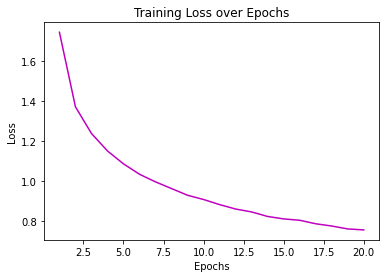

<Figure size 432x288 with 0 Axes>

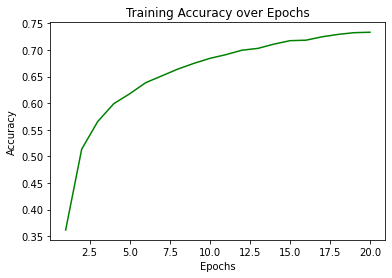

<Figure size 432x288 with 0 Axes>

In [31]:
plot_graph(x=epochs, y=loss, fmt="-m", title="Training Loss over Epochs", xLabel="Epochs", yLabel="Loss")
plot_graph(x=epochs, y=accuracy, fmt="-g", title="Training Accuracy over Epochs", xLabel="Epochs", yLabel="Accuracy")

## Summary of Model

In [34]:
print(f"Training Loss: {loss[-1]}")
print(f"Training Accuracy: {accuracy[-1]}")
print("--------------------------------------")
print(f"Validation Loss: {valLoss}")
print(f"Training Accuracy: {valAccuracy}")


Training Loss: 0.7553197741508484
Training Accuracy: 0.7331600189208984
--------------------------------------
Validation Loss: 0.807018518447876
Training Accuracy: 0.7246999740600586
